# 1 Import libraries and dataset

## 1.1 Import libraries

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1.2 Import dataset

* Import dataset and have a preview.

In [167]:
ukcars_df = pd.read_csv('cars_dataset_UK.csv')
print(ukcars_df.shape)
ukcars_df.head()

(72435, 10)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


* preview(Cont.)

In [168]:
ukcars_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


* Check the missing values and the variable types.

In [169]:
ukcars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


* Turn 'object' into category.

In [170]:
categoricals = list(ukcars_df.select_dtypes('object').columns)
numericals = [col for col in ukcars_df.columns if col not in categoricals]
print(categoricals)
print(numericals)
# Turn 'object' into category for less memory usage.
ukcars_df[categoricals] = ukcars_df[categoricals].astype('category')
ukcars_df[categoricals].dtypes

['model', 'transmission', 'fuelType', 'Make']
['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


model           category
transmission    category
fuelType        category
Make            category
dtype: object

* check the variable types again.

In [171]:
ukcars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   model         72435 non-null  category
 1   year          72435 non-null  int64   
 2   price         72435 non-null  int64   
 3   transmission  72435 non-null  category
 4   mileage       72435 non-null  int64   
 5   fuelType      72435 non-null  category
 6   tax           72435 non-null  float64 
 7   mpg           72435 non-null  float64 
 8   engineSize    72435 non-null  float64 
 9   Make          72435 non-null  category
dtypes: category(4), float64(3), int64(3)
memory usage: 3.7 MB


Check whether there are null values in the dataset.

In [172]:
# check whether there are null values in the dataset
ukcars_df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

# 2 Data Presentation

## 2.1 Basic information
* Derive the statistics of the dataset.
* Concepts we can discuss here: mean, std, quantile, etc.

In [173]:
ukcars_df.describe() #information for numerical variables.

,year,price,mileage,tax,mpg,engineSize
count,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000,72435.000000
mean,2017.073666,16580.158708,23176.517057,116.953407,55.852480,1.635650
std,2.101252,9299.028754,21331.515562,64.045533,17.114391,0.561535
min,1996.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10175.000000,7202.500000,30.000000,47.900000,1.200000
50%,2017.000000,14495.000000,17531.000000,145.000000,55.400000,1.600000
75%,2019.000000,20361.000000,32449.000000,145.000000,62.800000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,470.800000,6.600000


In [174]:
ukcars_df.describe(include = "category").T #information for categorical variables.

,count,unique,top,freq
model,72435,146,Fiesta,6556
transmission,72435,4,Manual,43021
fuelType,72435,5,Petrol,40370
Make,72435,7,Ford,17964


* check correlation between the variables of dataset.

## 2.2 Sample correlation

In [175]:
#check correlation between the variables of dataset
ukcarcor = ukcars_df.corr()

In [176]:
plt.subplots(figsize=(9,9),dpi=1080,facecolor='w')# 设置画布大小，分辨率，和底色

fig=sns.heatmap(ukcarcor,annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')#annot为热力图上显示数据；fmt='.2g'为数据保留两位有效数字,square呈现正方形，vmax最大值为1
fig
fig.get_figure().savefig('df_corr.png',bbox_inches='tight',transparent=True)

## 2.3 Overview of categorical variables

## 2.3.1 Counts

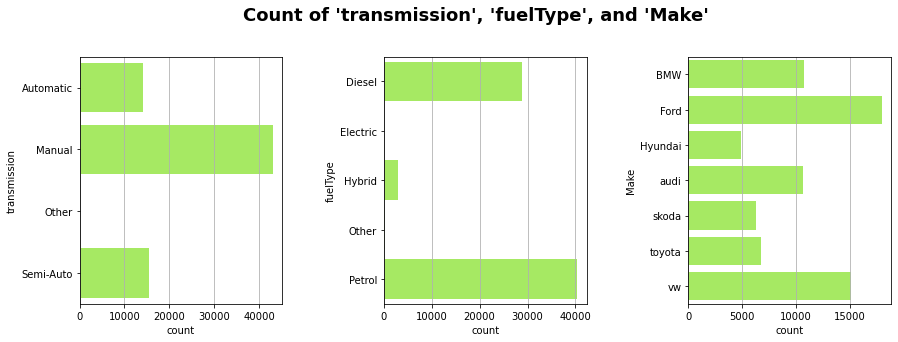

In [177]:
# Count plots for 'transmission', 'fuelType', 'Make'.
x=0
fig=plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("Count of 'transmission', 'fuelType', and 'Make'", x=0.4 ,y=0.95, family='Sherif', size=18, weight='bold')
for i in ukcars_df[categoricals[1:]]:
    ax = plt.subplot(241+x)
    ax = sns.countplot(data=ukcars_df, y=i, color='#a6ff4d')
    plt.grid(axis='x')
    x+=1

## 2.3.2 Mean price by certain features

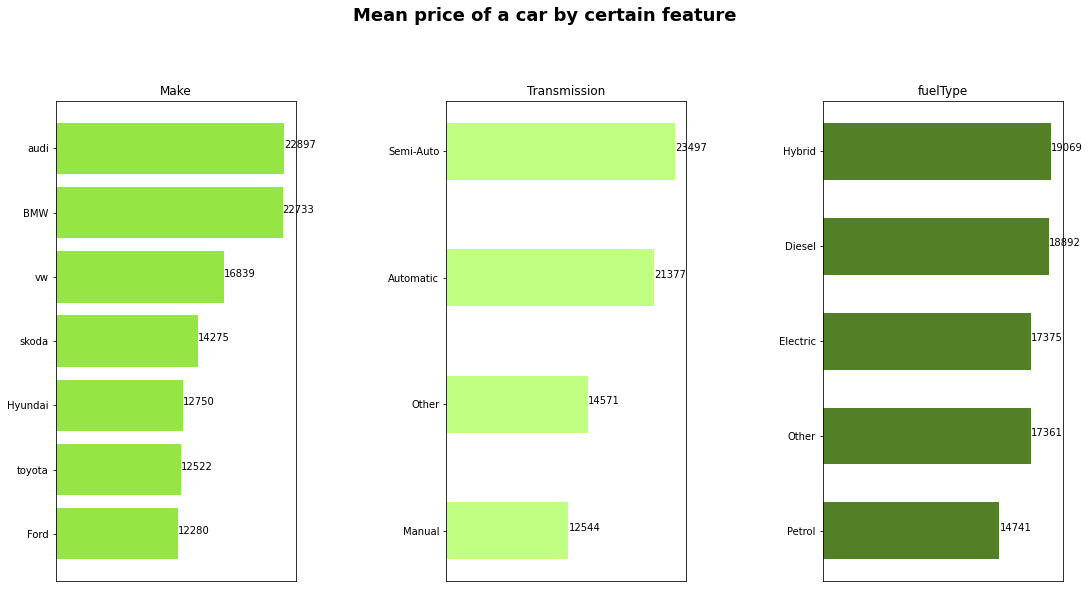

In [178]:
mp_make = ukcars_df.groupby('Make')['price'].mean().sort_values()
mp_transmission = ukcars_df.groupby('transmission')['price'].mean().sort_values()
mp_fueltype = ukcars_df.groupby('fuelType')['price'].mean().sort_values()


fig, ax = plt.subplots(1,3, figsize=[15,7], constrained_layout=True)
plt.suptitle("Mean price of a car by certain feature",y=1.15, family='Sherif', size=18, weight='bold')

# First plot
vals_0 = [round(i) for i in mp_make]
ax[0].barh(mp_make.index, mp_make, color = '#95e545')
ax[0].set_title("Make")
ax[0].set_xticks([])
for index, value in enumerate(vals_0):
    ax[0].text(value, index, str(value))
# Second plot
vals_1 = [round(i) for i in mp_transmission]
ax[1].barh(mp_transmission.index, mp_transmission, 0.45, color = '#c0ff82')
ax[1].set_title("Transmission")
ax[1].set_xticks([])
for index, value in enumerate(vals_1):
    ax[1].text(value, index, str(value))

# Third plot
vals_2 = [round(i) for i in mp_fueltype]
ax[2].barh(mp_fueltype.index, mp_fueltype, 0.6, color = '#537f26')
ax[2].set_title("fuelType")
ax[2].set_xticks([])
for index, value in enumerate(vals_2):
    ax[2].text(value, index, str(value))

# Layout spacing
fig.set_constrained_layout_pads(w_pad=2 / 72, h_pad=2 / 72, hspace=0.2,
                                wspace=0.2)

## 2.4 Histograms of numerical features

* We can talk about the distribution here.

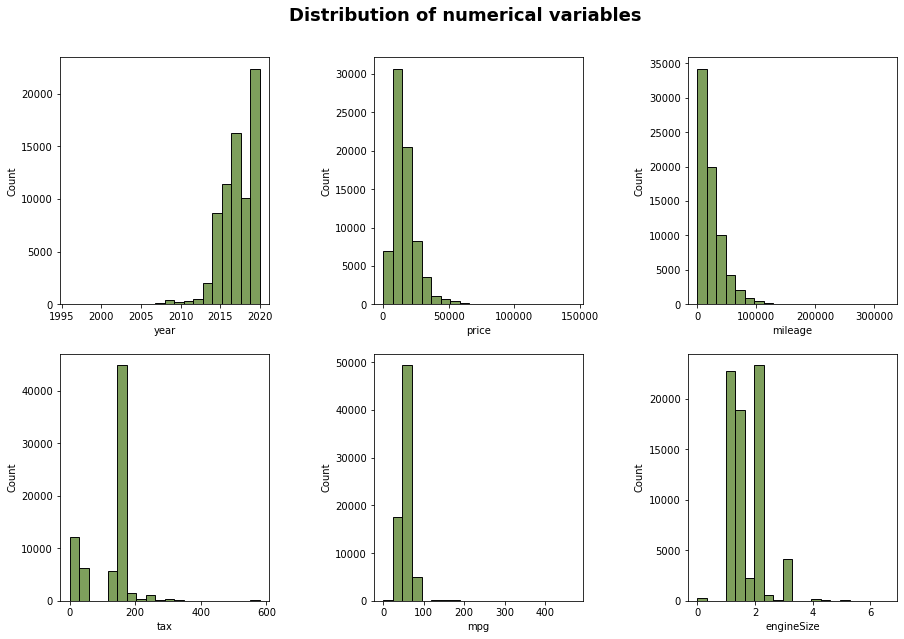

In [179]:
# Distribution of numerical features
x=0
fig=plt.figure(figsize=(15,10),constrained_layout =True)
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("Distribution of numerical variables",y=0.95, family='Sherif', size=18, weight='bold')
for i in ukcars_df[numericals]:
    ax = plt.subplot(231+x)
    ax = sns.histplot(data=ukcars_df, x=i, bins=20, color='#537f26')
    x+=1

## 2.4 Histogram of target

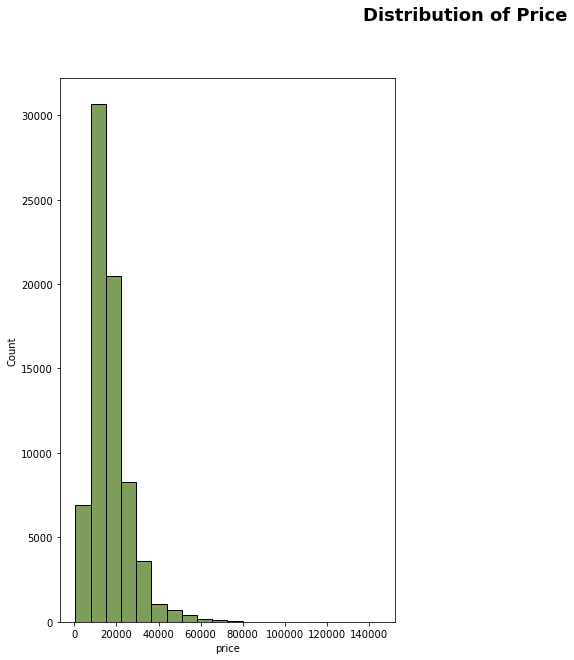

In [187]:
# Distribution of numerical features
fig=plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace = 0.5)
plt.suptitle("Distribution of Price",family='Sherif', size=18, weight='bold')
ax = sns.histplot(data=ukcars_df, x='price', bins=20, color='#537f26')
plt.show()

## 2.5 Trends

### 2.5.1 Mean mileage by year

<AxesSubplot:xlabel='year', ylabel='mileage'>

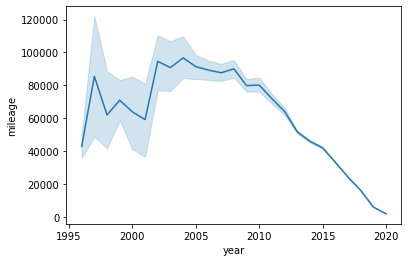

In [58]:
sns.lineplot(data=ukcars_df, x=ukcars_df['year'], y=ukcars_df['mileage'], legend='auto')

### 2.5.2 Mean price by year

<AxesSubplot:xlabel='year', ylabel='price'>

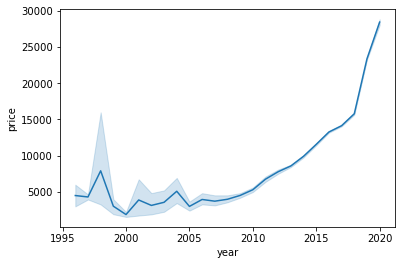

In [59]:
sns.lineplot(data=ukcars_df, x=ukcars_df['year'], y=ukcars_df['price'], legend='auto')

### 2.5.2 Mean price by engine size

<AxesSubplot:xlabel='engineSize', ylabel='price'>

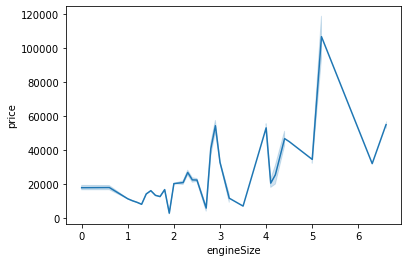

In [60]:
sns.lineplot(data=ukcars_df, x=ukcars_df['engineSize'], y=ukcars_df['price'], legend='auto')

# 3 Linear Regression (Normalized)

## 3.1 Data Spliting

* Split the dataset into training set and testing set.
* *Why we do this*: we fit the model using the training set and testing set, if the model perform well on testing set (usually revealed by high $R^2$), the model we fitted is satisfied (no over-fitting) and can be used to predict real-world data.

In [61]:
# select dependent variable (label)
ukcars_df_reg = ukcars_df.copy()
ukcars_df_2 = ukcars_df_reg.drop(['model'], axis = 1)
ukcars_df_dummy = pd.get_dummies(ukcars_df_2, drop_first = True) #encode the variables of the dataset

In [62]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(ukcars_df_dummy, test_size = 0.2, random_state = 123)
df_train

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,Make_Ford,Make_Hyundai,Make_audi,Make_skoda,Make_toyota,Make_vw
55001,2016,18500,46035,20.0,55.4,2.5,0,0,0,0,1,0,0,0,0,0,0,1,0
6036,2019,28790,3150,145.0,38.2,1.5,0,0,1,0,0,0,1,0,0,1,0,0,0
5815,2016,13490,21114,20.0,60.1,1.0,1,0,0,0,0,0,1,0,0,1,0,0,0
12541,2017,19832,15242,145.0,57.6,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0
66542,2016,8391,108000,20.0,67.3,1.6,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63206,2019,16490,11814,150.0,45.6,1.5,0,0,1,0,0,0,1,0,0,0,1,0,0
61404,2016,8198,64164,0.0,74.3,1.6,1,0,0,0,0,0,0,0,0,0,1,0,0
17730,2019,59694,2881,150.0,31.7,3.0,0,0,1,0,0,0,1,0,0,0,0,0,0
28030,2014,9400,11817,145.0,47.9,1.6,0,0,1,0,0,0,1,1,0,0,0,0,0


## 3.2 Feature scaling (Standardization)

* Pre-processing: Standardization.
* The concept of standardization comes into picture when continuous independent variables are measured at different scales. It means these variables do not give equal contribution to the analysis.
* The idea is to rescale an original variable to have equal range and/or variance.
* We used Min-Max Scaling (0-1 scaling) here.

In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['year', 'price', 'mileage', 'tax', 'mpg','engineSize']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train # you can see that all the values lies between 0 and 1.

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,Make_Ford,Make_Hyundai,Make_audi,Make_skoda,Make_toyota,Make_vw
55001,0.833333,0.123506,0.153447,0.034483,0.115606,0.378788,0,0,0,0,1,0,0,0,0,0,0,1,0
6036,0.958333,0.194803,0.010497,0.250000,0.078987,0.227273,0,0,1,0,0,0,1,0,0,1,0,0,0
5815,0.833333,0.088793,0.070377,0.034483,0.125612,0.151515,1,0,0,0,0,0,1,0,0,1,0,0,0
12541,0.875000,0.132735,0.050804,0.250000,0.120290,0.303030,0,0,1,0,0,0,0,0,0,0,0,0,0
66542,0.833333,0.053463,0.359998,0.034483,0.140941,0.242424,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63206,0.958333,0.109579,0.039377,0.258621,0.094741,0.227273,0,0,1,0,0,0,1,0,0,0,1,0,0
61404,0.833333,0.052125,0.213877,0.000000,0.155844,0.242424,1,0,0,0,0,0,0,0,0,0,1,0,0
17730,0.958333,0.408931,0.009600,0.258621,0.065148,0.454545,0,0,1,0,0,0,1,0,0,0,0,0,0
28030,0.750000,0.060454,0.039387,0.250000,0.099638,0.242424,0,0,1,0,0,0,1,1,0,0,0,0,0


## 3.3 Model fitting

* Now, we fit the model on our training set.
* The coeffcient estimators derived from scaled dataset can reveal the influence of variables towards to the target clearly.

In [137]:
y_train = df_train["price"]
X_train = df_train.drop('price', axis = 1)

In [138]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model 1

In [139]:
X_train_new = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                 1.045e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:03:49   Log-Likelihood:             1.1875e+05
No. Observations:               57948   AIC:                        -2.375e+05
Df Residuals:                   57929   BIC:                        -2.373e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

* p-vale of "transmission_Other" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

### Model 2

In [140]:
X_train_new = X_train.drop(["transmission_Other"], axis = 1)

In [141]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                 1.107e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:03:50   Log-Likelihood:             1.1875e+05
No. Observations:               57948   AIC:                        -2.375e+05
Df Residuals:                   57930   BIC:                        -2.373e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

* p-values are all smaller than 0.05, which means all the variable coeffcients are significant in this model.
* Prob (F-statistic) = 0 means that at least one coeffcient is significant.

In [142]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,403.84
12,Make_Ford,2.80
5,engineSize,2.78
2,mileage,2.50
6,transmission_Manual,2.46
1,year,2.39
17,Make_vw,2.27
16,Make_toyota,2.05
11,fuelType_Petrol,1.97
4,mpg,1.88


## 3.4 Residual Analysis of Model

In [143]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

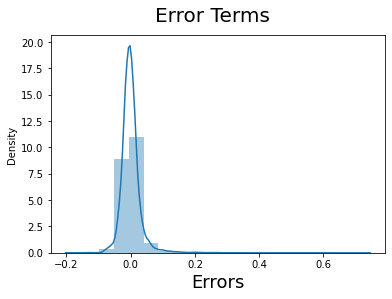

In [144]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## 3.5 Model Evaluation

In [145]:
#Scaling the test set
scaler = MinMaxScaler()
num_vars = ['year', 'price', 'mileage', 'tax', 'mpg','engineSize']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,Make_Ford,Make_Hyundai,Make_audi,Make_skoda,Make_toyota,Make_vw
18311,0.476190,0.072246,0.235292,0.560345,0.063337,0.576923,1,0,0,0,0,0,1,0,0,0,0,0,0
37597,0.857143,0.074736,0.084195,0.258621,0.139001,0.192308,1,0,0,0,0,0,1,1,0,0,0,0,0
32162,0.904762,0.108429,0.021669,0.250000,0.124548,0.192308,1,0,0,0,0,0,1,1,0,0,0,0,0
37015,0.714286,0.070720,0.026099,0.250000,0.101169,0.307692,0,0,0,0,0,0,1,1,0,0,0,0,0
46796,0.809524,0.065499,0.101545,0.034483,0.127099,0.192308,1,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36860,0.904762,0.100438,0.030146,0.250000,0.121998,0.192308,1,0,0,0,0,0,1,1,0,0,0,0,0
58904,0.952381,0.084334,0.004331,0.250000,0.121998,0.192308,1,0,0,0,0,0,1,0,0,0,0,1,0
70799,0.904762,0.073844,0.021124,0.250000,0.124548,0.230769,1,0,0,0,0,0,1,0,1,0,0,0,0
1969,0.952381,0.220835,0.000152,0.250000,0.083953,0.384615,0,0,1,0,0,0,1,0,0,1,0,0,0


In [146]:
y_test = df_test["price"]
X_test = df_test.drop('price', axis = 1)

In [147]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [148]:
# Making predictions
y_pred = lm.predict(X_test_new)
y_pred.head()

18311    0.120945
37597    0.068185
32162    0.094076
37015    0.110718
46796    0.062454
dtype: float64

* Derive the coefficient of determination ($R^2$) on the testing set.

In [149]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7603951182199808

Text(0, 0.5, 'y_pred')

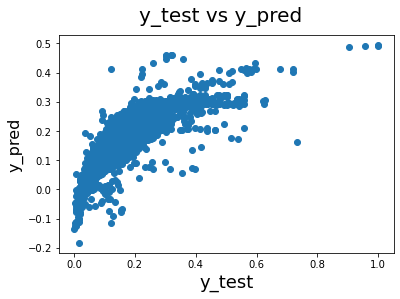

In [150]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [78]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                 1.107e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:17:51   Log-Likelihood:             1.1875e+05
No. Observations:               57948   AIC:                        -2.375e+05
Df Residuals:                   57930   BIC:                        -2.373e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

# 4 Linear Regression (Non-normalized)

## 4.1 Data Splitting

In [291]:
ukcars_df_dummy = pd.get_dummies(ukcars_df_2, drop_first = True)
ukcars_df_reg2 = ukcars_df_dummy.copy()
df_train, df_test = train_test_split(ukcars_df_reg2, test_size = 0.2, random_state = 123)
X_train = df_train.drop(columns=["price",'transmission_Other'])
y_train = df_train["price"]

## 4.2 Model Fitting

In [292]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [293]:
X_train_model = build_model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                 1.107e+04
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:42:41   Log-Likelihood:            -5.6966e+05
No. Observations:               57948   AIC:                         1.139e+06
Df Residuals:                   57930   BIC:                         1.140e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.00

## 4.3 Model Evaluating

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
ukcars_df_dummy = pd.get_dummies(ukcars_df_2, drop_first = True)
ukcars_df_reg2 = ukcars_df_dummy.copy()
X = ukcars_df_reg2.drop(columns=["price",'transmission_Other'])
y = ukcars_df_reg2["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#random_state ensures that the results are the same

In [295]:
# R_2 Score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
# Evaluation
y_pred = lr.predict(X_test)
print(lr.intercept_)
print(lr.coef_)
print(lr.score(X_test, y_test))
print(r2_score(y_test, y_pred))

-3000707.1975265695
[ 1.49173454e+03 -9.35063226e-02 -1.48233671e+00 -3.98354641e+01
  8.88341935e+03 -2.14308530e+03  3.27421189e+02  1.66931663e+04
  4.28897989e+03  2.96847695e+03  9.15981429e+02 -1.78534012e+03
 -3.46851839e+03  2.31119460e+03 -2.44174958e+03 -4.22793777e+03
 -8.36307237e+02]
0.7680766261743494
0.7680766261743494


Text(0, 0.5, 'y_pred')

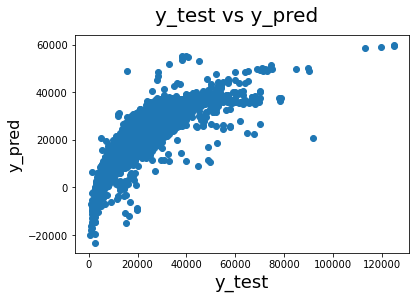

In [296]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

* Reference link: https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

# 5 Linear Regression (Non-normalized, but with log terms)

## 5.1 derive the regression results

In [244]:
ukcars_df_dummy = pd.get_dummies(ukcars_df_2, drop_first = True)
ukcars_df_reg = ukcars_df_dummy.copy()

In [245]:
ukcars_df_reg["log_price"] = ukcars_df_reg["price"].apply(np.log)
ukcars_df_reg["log_year"] = ukcars_df_reg["year"].apply(np.log)
ukcars_df_reg["log_mileage"] = ukcars_df_reg["mileage"].apply(np.log)
ukcars_df_reg["log_mpg"] = ukcars_df_reg["mpg"].apply(np.log)
ukcars_df_logreg = ukcars_df_reg.drop(columns=['year','price','mileage','mpg','transmission_Other'])

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
df_train_log, df_test_log = train_test_split(ukcars_df_logreg, test_size = 0.2, random_state = 123)
X_log_train = df_train_log.drop(columns="log_price")
y_log_train = df_train_log["log_price"]
X_log_train

,tax,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,Make_Ford,Make_Hyundai,Make_audi,Make_skoda,Make_toyota,Make_vw,log_year,log_mileage,log_mpg
55001,20.0,2.5,0,0,0,1,0,0,0,0,0,0,1,0,7.608871,10.737157,4.014580
6036,145.0,1.5,0,1,0,0,0,1,0,0,1,0,0,0,7.610358,8.055158,3.642836
5815,20.0,1.0,1,0,0,0,0,1,0,0,1,0,0,0,7.608871,9.957692,4.096010
12541,145.0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,7.609367,9.631810,4.053523
66542,20.0,1.6,1,0,0,0,0,0,0,0,0,1,0,0,7.608871,11.589887,4.209160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63206,150.0,1.5,0,1,0,0,0,1,0,0,0,1,0,0,7.610358,9.377041,3.819908
61404,0.0,1.6,1,0,0,0,0,0,0,0,0,1,0,0,7.608871,11.069198,4.308111
17730,150.0,3.0,0,1,0,0,0,1,0,0,0,0,0,0,7.610358,7.965893,3.456317
28030,145.0,1.6,0,1,0,0,0,1,1,0,0,0,0,0,7.607878,9.377294,3.869116


In [247]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [248]:
X_log_train_model = build_model(X_log_train,y_log_train)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 2.111e+04
Date:                Mon, 10 Oct 2022   Prob (F-statistic):               0.00
Time:                        00:24:38   Log-Likelihood:                 13553.
No. Observations:               57948   AIC:                        -2.707e+04
Df Residuals:                   57930   BIC:                        -2.691e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2078

## 5.2 Model Evaluation

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = ukcars_df_logreg.drop(columns="log_price")
y = ukcars_df_logreg["log_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [302]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_log_train, y_log_train)

LinearRegression()

In [303]:
print(lr.intercept_)
print(lr.coef_)

-2078.48868501894
[ 1.29815776e-04  2.97080553e-01 -1.22153997e-01  1.33928846e-02
  8.93230200e-01  3.60892746e-01  1.27074280e-01 -7.91074421e-02
 -1.49910361e-01 -2.89351796e-01  1.00581170e-01 -1.85250174e-01
 -3.09454115e-01 -7.05381074e-02  2.74585743e+02 -2.18750746e-02
 -3.64638309e-01]


### 5.2.1 Evaluation by log_price

In [309]:
# Evaluation
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.8622496969667681

In [310]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.8622496969667691


Text(0, 0.5, 'log_price_pred')

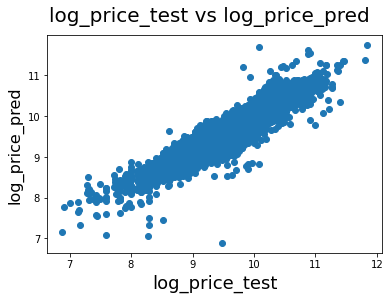

In [311]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('log_price_test vs log_price_pred', fontsize=20)              # Plot heading 
plt.xlabel('log_price_test', fontsize=18)                          # X-label
plt.ylabel('log_price_pred', fontsize=16)   

### 5.2.2 Evaluation by price

In [312]:
# Evaluation
y_pred = lr.predict(X_test)
r2_score(np.exp(y_test), np.exp(y_pred)) #exp(log(price)) = price

0.8281525011762696

Text(0, 0.5, 'price_pred')

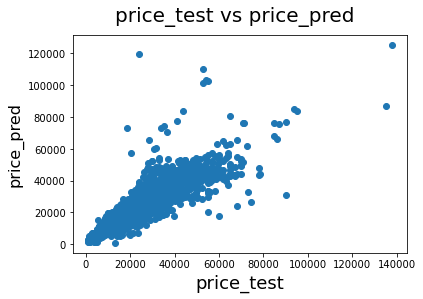

In [313]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(np.exp(y_test),np.exp(y_pred))
fig.suptitle('price_test vs price_pred', fontsize=20)              # Plot heading 
plt.xlabel('price_test', fontsize=18)                          # X-label
plt.ylabel('price_pred', fontsize=16)   